In [1]:
import pandas
#Primero se leen los datos
disp_df = pandas.read_csv("disp_st8ns1.txt.bz2", compression="bz2", index_col=0)
print(disp_df)

       apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1       0.000000    0.000000    0.000000    0.000000    0.000000  276.583582   
V2       0.000000    0.000000    0.011818    0.037273    0.543636  249.089505   
V3       0.014545    0.000000    0.000000    0.000000    0.002727  229.461820   
V4       0.000000    0.009091    0.000000    0.000000    0.000000  239.590321   
V5       0.000000    0.000000    0.000000    0.000000    0.000000  230.253657   
...           ...         ...         ...         ...         ...         ...   
V4376    0.000909    0.114545    0.352727    0.882727    1.379091  284.532288   
V4377    0.000909    0.000000    0.000000    0.000000    0.000000  251.460183   
V4378    0.000000    0.000000    0.000000    0.000000    0.000000  268.446164   
V4379    0.000000    0.000000    0.000000    0.000000    0.000000  268.225686   
V4380    0.000000    0.000000    0.000000    0.000000    0.000000  268.385348   

       dlwrf_s2_1  dlwrf_s3

###3) Análisis exploratorio de datos

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Se muestra el contenido del dataframe
disp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18  pres_ms4_1  4380 non-null   float64
 19  pres_ms5_1  4380 non-null   fl

In [4]:
# Se visualiza una muestra aleatoria de los datos
print(disp_df.sample(6))

       apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1875    0.046364    0.004545    0.100000    0.570909    0.803636  308.718126   
V3960    3.625455    8.002727   10.251818    0.366364    0.505455  330.886067   
V4316    0.000000    0.000000    0.000000    0.000000    0.000000  241.951946   
V1812    0.000000    0.000000    0.000000    0.000000    0.000000  235.875422   
V590     0.000000    0.000000    0.000000    0.000000    0.000000  402.074283   
V3522    0.019091    0.060000    0.060909    0.000000    0.000000  405.605624   

       dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t2_1  \
V1875  269.874892  279.693026  315.582589  312.750305  ...  230.377537   
V3960  334.861772  334.539498  337.420044  335.329962  ...  201.243933   
V4316  240.332463  251.017043  273.115989  271.603588  ...  251.316179   
V1812  237.985711  244.757682  268.176985  267.797857  ...  239.880553   
V590   400.255435  409.006833  428.750491  426.672563  ...  30

In [5]:
# Se visualizan los 9 primeros registros de datos
print(disp_df.head(9))

    apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1    0.000000    0.000000    0.000000    0.000000    0.000000  276.583582   
V2    0.000000    0.000000    0.011818    0.037273    0.543636  249.089505   
V3    0.014545    0.000000    0.000000    0.000000    0.002727  229.461820   
V4    0.000000    0.009091    0.000000    0.000000    0.000000  239.590321   
V5    0.000000    0.000000    0.000000    0.000000    0.000000  230.253657   
V6    0.000000    0.000000    0.000000    0.003636    0.022727  262.650191   
V7    0.000000    0.000000    0.000000    0.000000    0.000000  241.442841   
V8    0.000000    0.000000    0.000000    0.000000    0.000000  208.358092   
V9    0.000000    0.000000    0.000000    0.000000    0.001818  224.955149   

    dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t2_1  \
V1  246.514368  251.629031  264.832217  262.468350  ...  249.504475   
V2  282.460488  297.254822  315.532651  310.292719  ...  200.094627   
V3  21

In [6]:
# Número de filas y columnas del conjunto de datos
print(disp_df.shape)

# Tipos de las variables
print(disp_df.dtypes)

(4380, 76)
apcp_sf1_1    float64
apcp_sf2_1    float64
apcp_sf3_1    float64
apcp_sf4_1    float64
apcp_sf5_1    float64
               ...   
uswrf_s2_1    float64
uswrf_s3_1    float64
uswrf_s4_1    float64
uswrf_s5_1    float64
salida          int64
Length: 76, dtype: object


In [7]:
# Observar valores nulos. En esta primera sentencia se observan en una tabla
# valores booleanos que especifican si ese campo es nulo.
print(disp_df.isnull())

# Se contabilizan los valores nulos.
print(disp_df.isnull().sum())

       apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1          False       False       False       False       False       False   
V2          False       False       False       False       False       False   
V3          False       False       False       False       False       False   
V4          False       False       False       False       False       False   
V5          False       False       False       False       False       False   
...           ...         ...         ...         ...         ...         ...   
V4376       False       False       False       False       False       False   
V4377       False       False       False       False       False       False   
V4378       False       False       False       False       False       False   
V4379       False       False       False       False       False       False   
V4380       False       False       False       False       False       False   

       dlwrf_s2_1  dlwrf_s3

In [8]:
print(disp_df.value_counts())

apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  dswrf_s1_1  dswrf_s2_1  dswrf_s3_1  dswrf_s4_1  dswrf_s5_1  pres_ms1_1     pres_ms2_1     pres_ms3_1     pres_ms4_1     pres_ms5_1     pwat_ea1_1  pwat_ea2_1  pwat_ea3_1  pwat_ea4_1  pwat_ea5_1  spfh_2m1_1  spfh_2m2_1  spfh_2m3_1  spfh_2m4_1  spfh_2m5_1  tcdc_ea1_1  tcdc_ea2_1  tcdc_ea3_1  tcdc_ea4_1  tcdc_ea5_1  tcolc_e1_1  tcolc_e2_1  tcolc_e3_1  tcolc_e4_1  tcolc_e5_1  tmax_2m1_1  tmax_2m2_1  tmax_2m3_1  tmax_2m4_1  tmax_2m5_1  tmin_2m1_1  tmin_2m2_1  tmin_2m3_1  tmin_2m4_1  tmin_2m5_1  tmp_2m_1_1  tmp_2m_2_1  tmp_2m_3_1  tmp_2m_4_1  tmp_2m_5_1  tmp_sfc1_1  tmp_sfc2_1  tmp_sfc3_1  tmp_sfc4_1  tmp_sfc5_1  ulwrf_s1_1  ulwrf_s2_1  ulwrf_s3_1  ulwrf_s4_1  ulwrf_s5_1  ulwrf_t1_1  ulwrf_t2_1  ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1  uswrf_s1_1  uswrf_s2_1  uswrf_s3_1  uswrf_s4_1  uswrf_s5_1  salida  
0.000000    0.000000    0.000000    0.000000    0.000000    154.335406  152.

In [9]:
disp_df.describe()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,...,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03
mean,0.708567,0.293943,0.525002,0.260699,0.530149,314.901998,315.658584,323.094642,342.390701,341.641629,...,244.779701,248.995312,258.995144,258.164788,0.138979,40.085803,77.038377,125.458012,97.172893,1.594500e+07
std,2.599816,1.211324,1.900262,1.000023,1.975711,56.241545,58.376389,59.334196,61.733754,61.695498,...,37.662362,37.157497,39.951473,39.538514,0.337704,27.012235,32.117291,43.376068,36.612104,8.112528e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,154.335406,152.760176,157.433634,175.691114,173.524779,...,115.091405,118.820144,109.060597,116.585080,0.000000,0.090909,2.909091,4.818182,2.727273,7.470000e+04
25%,0.000000,0.000000,0.000000,0.000000,0.000000,268.206411,267.874264,274.796959,292.816105,291.259751,...,227.355142,231.339967,240.989062,239.332283,0.000000,14.727273,52.613636,104.909091,71.000000,9.667200e+06
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.405290,319.207540,326.240827,345.789484,344.639153,...,250.098898,254.305866,267.363606,265.883269,0.000000,37.000000,80.318182,134.545455,102.727273,1.565535e+07
75%,0.138409,0.047500,0.140909,0.038182,0.092955,364.984977,368.697012,376.999899,398.002730,396.524137,...,273.489209,277.242391,288.239120,287.865822,0.000000,63.750000,104.090909,154.181818,127.818182,2.299088e+07
max,51.623637,22.934545,32.982727,15.975455,39.899091,422.276065,427.649256,430.104545,460.657246,461.183133,...,311.586634,313.781505,324.802854,325.166243,1.000000,102.000000,283.818182,483.090909,294.818182,3.170220e+07


# 4) Datos

In [10]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import PredefinedSplit
from sklearn.preprocessing import MinMaxScaler

C:\Users\joaqu\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


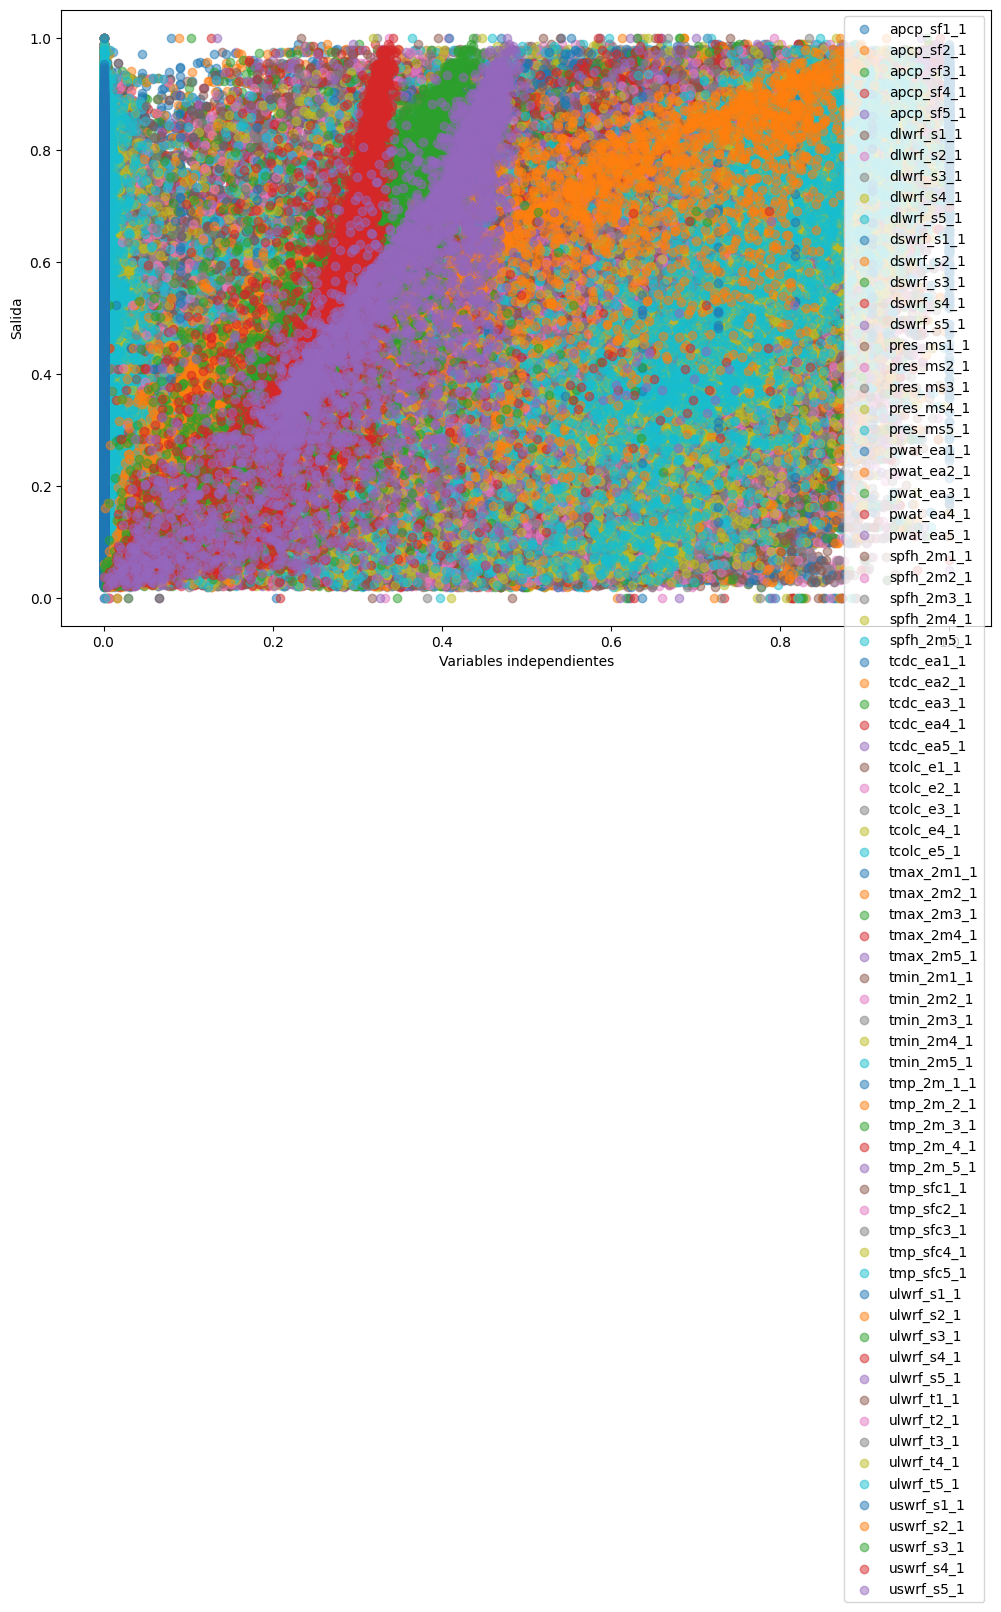

In [55]:
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(disp_df)

# Crear DataFrame a partir de los datos normalizados
df_normalized = pd.DataFrame(normalized_data, columns=disp_df.columns)

# Conjuntos de entrenamiento y prueba
X = df_normalized.select_dtypes(include=np.number).columns.tolist()
y = ["salida"]
X_train, X_test = np.array_split(df_normalized[X], [3650])
y_train, y_test = np.array_split(df_normalized[y], [3650])

train_indices = np.full((2920,), -1, dtype=int)

val_indices = np.full((730,), 0, dtype=int)
test_fold = np.append(train_indices, val_indices)


ps = PredefinedSplit(test_fold)

fig, ax = plt.subplots(figsize=(12,8))

# Iterar por todas las columnas del dataframe excepto "salida"
for column in df_normalized.columns.drop("salida"):
    ax.scatter(df_normalized[column], df_normalized["salida"], alpha=0.5, label=column)

ax.set_xlabel("Variables independientes")
ax.set_ylabel("Salida")
ax.legend()
plt.show()


## 5) Métodos básicos

## KNN

In [12]:
# KNN
knn = KNeighborsRegressor()
np.random.seed(53)

start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Coeficiente de determinación del modelo: 0.8962484021949975
Error cuadrático medio (MSE): 0.006001067573352047
Raíz cuadrada del error cuadrático medio (RMSE): 0.0774665577739972
Mean Absolute Error (MAE): 0.054359549091901334
Tiempo de entrenamiento: 0.008000612258911133


## KNN evaluado con MAE

In [13]:
param_grid = {'n_neighbors': np.arange(1, 45),
              'weights': ['uniform', 'distance'],
              'metric': ['manhattan', 'euclidean', 'minkowski'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}


knn = KNeighborsRegressor()
np.random.seed(53)

grid_search = GridSearchCV(knn, 
                   param_grid,
                   scoring="neg_mean_absolute_error",
                   cv=ps,
                   n_jobs = -1,
                   verbose = 1)


start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 1056 candidates, totalling 1056 fits
Mejores hiperparámetros: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Mejor puntuación de validación cruzada: 0.05247955693651187
Coeficiente de determinación del modelo: 0.8944513453330984
Error cuadrático medio (MSE): 0.006105010644008953
Raíz cuadrada del error cuadrático medio (RMSE): 0.07813456753581575
Mean Absolute Error (MAE): 0.05414494798249288
Tiempo de entrenamiento: 25.86762285232544


## KNN evaluado con RMSE

In [14]:
param_grid = {'n_neighbors': np.arange(1, 45),
                'weights': ['uniform', 'distance'],
                'metric': ['manhattan', 'euclidean', 'minkowski'],
                'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}

inner = KFold(n_splits=5, shuffle=True, random_state=53)
#scoring = {'mae': make_scorer(mean_absolute_error), 'rmse': make_scorer(mean_squared_error, squared=False)}

grid_search = GridSearchCV(KNeighborsRegressor(), 
                   param_grid,
                   scoring="neg_root_mean_squared_error",
                   cv=ps,
                   n_jobs = 1,
                   verbose = 1)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 1056 candidates, totalling 1056 fits
Mejores hiperparámetros: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
Mejor puntuación de validación cruzada: 0.07236172877115249
Coeficiente de determinación del modelo: 0.8952127669631347
Error cuadrático medio (MSE): 0.006060969465363712
Raíz cuadrada del error cuadrático medio (RMSE): 0.07785222839048161
Mean Absolute Error (MAE): 0.05375495282575767
Tiempo de entrenamiento: 116.34656739234924


## Árbol de regresión

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import tree
import numpy as np
import time

In [16]:
# Árbol de regresión 
regressor = DecisionTreeRegressor()
np.random.seed(53)

start_time = time.time()
regressor.fit(X_train, y_train)
end_time = time.time()

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time
r2 = r2_score(y_test, y_pred)


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Coeficiente de determinación del modelo: 0.9999825975245386
Error cuadrático medio (MSE): 1.0065717868204894e-06
Raíz cuadrada del error cuadrático medio (RMSE): 0.0010032805125290182
Mean Absolute Error (MAE): 0.00046389870095276347
Tiempo de entrenamiento: 0.28171229362487793


# Arbol de regresión evaluado con MAE

In [17]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 9, 13],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

inner = KFold(n_splits=5, shuffle=True, random_state=53)
#scoring = {'mae': make_scorer(mean_absolute_error), 'rmse': make_scorer(mean_squared_error, squared=False)}

grid_search = GridSearchCV(DecisionTreeRegressor(), 
                        param_grid, 
                        cv=ps, 
                        scoring="neg_mean_absolute_error",
                        n_jobs = 1,
                        verbose = 1 )

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 175 candidates, totalling 175 fits
Mejores hiperparámetros: {'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 6}
Mejor puntuación de validación cruzada: 0.0005384237967002407
Coeficiente de determinación del modelo: 0.9999842918959795
Error cuadrático medio (MSE): 9.08568115292897e-07
Raíz cuadrada del error cuadrático medio (RMSE): 0.0009531883944388418
Mean Absolute Error (MAE): 0.0004156022535443061
Tiempo de entrenamiento: 21.27544331550598


In [18]:
from sklearn.model_selection import cross_val_score 
inner = KFold(n_splits=5, shuffle=True, random_state=53) 
scores = cross_val_score(DecisionTreeRegressor(), X_train, y_train, cv=inner, scoring='neg_mean_absolute_error')
print('Puntuación MAE:', -scores)
print('Media MAE:', -scores.mean())

Puntuación MAE: [0.00057422 0.00055221 0.00061219 0.00055731 0.0006186 ]
Media MAE: 0.0005829072540694706


# Arbol de regresión evaluado con RMSE

In [19]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 9, 13],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

inner = KFold(n_splits=5, shuffle=True, random_state=53)
#scoring = {'mae': make_scorer(mean_absolute_error), 'rmse': make_scorer(mean_squared_error, squared=False)}

grid_search = GridSearchCV(DecisionTreeRegressor(), 
                        param_grid, 
                        cv=ps, 
                        scoring="neg_root_mean_squared_error",
                        n_jobs = 1,
                        verbose = 1 )

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 175 candidates, totalling 175 fits
Mejores hiperparámetros: {'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 3}
Mejor puntuación de validación cruzada: 0.0008034235610798755
Coeficiente de determinación del modelo: 0.9999825625432016
Error cuadrático medio (MSE): 1.0085951326873614e-06
Raíz cuadrada del error cuadrático medio (RMSE): 0.001004288371279565
Mean Absolute Error (MAE): 0.0005357790774110306
Tiempo de entrenamiento: 18.844745874404907


In [20]:
from sklearn.model_selection import cross_val_score 
inner = KFold(n_splits=5, shuffle=True, random_state=53) 
scores = cross_val_score(DecisionTreeRegressor(), X_train, y_train, cv=inner, scoring='neg_root_mean_squared_error')
print('Puntuación RMSE:', -scores)
print('Media RMSE:', -scores.mean())

Puntuación RMSE: [0.00076846 0.00089464 0.00097213 0.00082107 0.00105336]
Media RMSE: 0.0009019333461979088


## Regresión lineal

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import time

def pintaResultados(reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(y_test[:n].size)
  pred = reg.predict(X=X_test)
  plt.plot(x, y_test[:n], 'b.', x, pred[:n], 'g^')

Coeficiente de determinación del modelo: 1.0
Error cuadrático medio (MSE): 1.3835541249167633e-30
Raíz cuadrada del error cuadrático medio (RMSE): 1.1762457757274894e-15
Mean Absolute Error (MAE): 1.0197989722810429e-15
Tiempo de entrenamiento: 0.03233170509338379


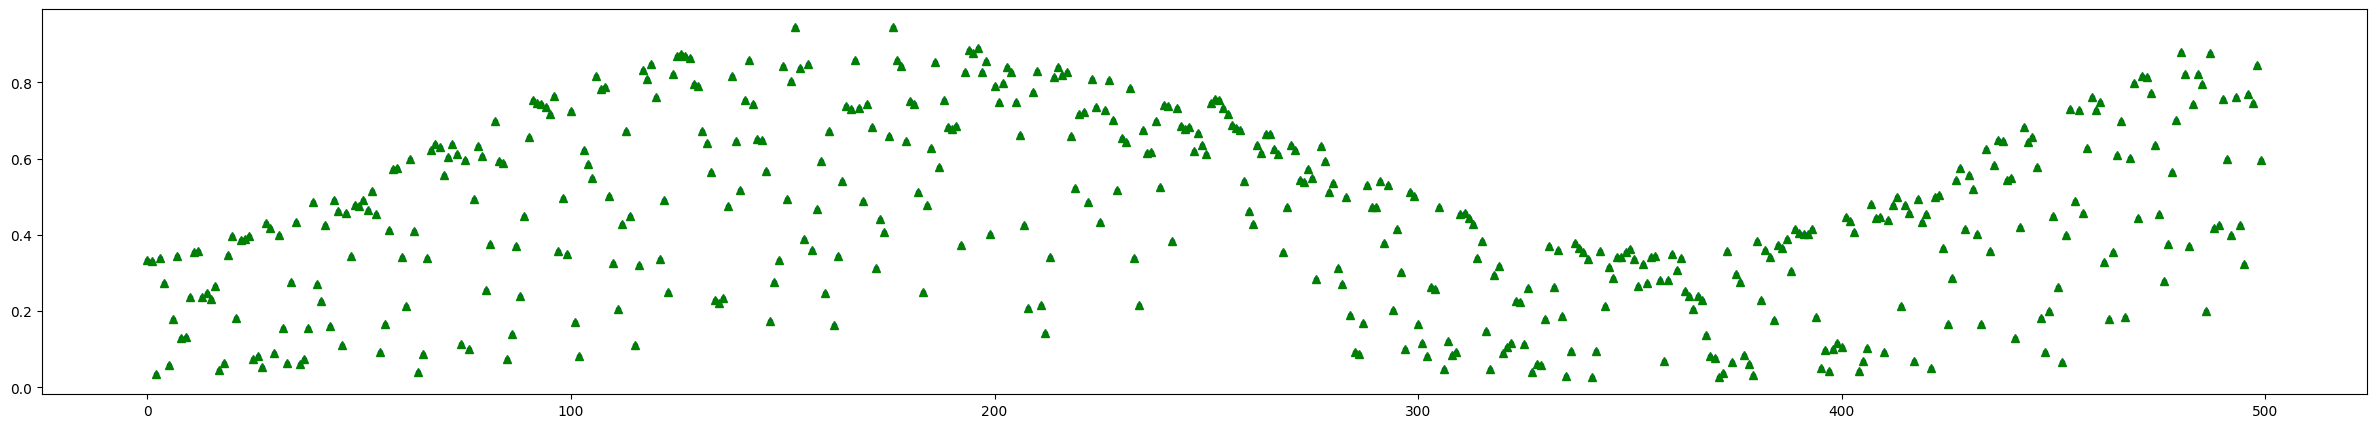

In [41]:
reg_lin = LinearRegression()

np.random.seed(53)
start_time = time.time()
reg_lin.fit(X_train, y_train)
end_time = time.time()

y_pred = reg_lin.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(reg_lin, 500)


# Regresión lineal evaluada con MAE

In [24]:
reg_lin = LinearRegression()
param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(reg_lin, 
                        param_grid, 
                        cv=5, 
                        scoring="neg_mean_absolute_error",
                        n_jobs = 1,
                        verbose = 1 )

# Ajustar el objeto GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados por GridSearchCV
best_params = grid_search.best_params_

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mejores hiperparámetros: {'fit_intercept': True}
Mejor puntuación de validación cruzada: 6.098089714164603e-09
Coeficiente de determinación del modelo: 1.0
Error cuadrático medio (MSE): 1.2695168761155564e-16
Raíz cuadrada del error cuadrático medio (RMSE): 1.1267283950072247e-08
Mean Absolute Error (MAE): 9.111253136437232e-09
Tiempo de entrenamiento: 0.2338709831237793


## Regresión lineal evaluada con RMSE

In [25]:
reg_lin = LinearRegression()
param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(reg_lin, 
                        param_grid, 
                        cv=5, 
                        scoring="neg_root_mean_squared_error",
                        n_jobs = 1,
                        verbose = 1 )

# Ajustar el objeto GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados por GridSearchCV
best_params = grid_search.best_params_

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mejores hiperparámetros: {'fit_intercept': True}
Mejor puntuación de validación cruzada: 8.19609499289457e-09
Coeficiente de determinación del modelo: 1.0
Error cuadrático medio (MSE): 1.2695168761155564e-16
Raíz cuadrada del error cuadrático medio (RMSE): 1.1267283950072247e-08
Mean Absolute Error (MAE): 9.111253136437232e-09
Tiempo de entrenamiento: 0.2301347255706787


# Minimos cuadrados

Error cuadrático medio (MSE): 1.3835541249167633e-30
Raíz cuadrada del error cuadrático medio (RMSE): 1.1762457757274894e-15
Mean Absolute Error (MAE): 1.0197989722810429e-15
Tiempo de entrenamiento: 0.030361413955688477


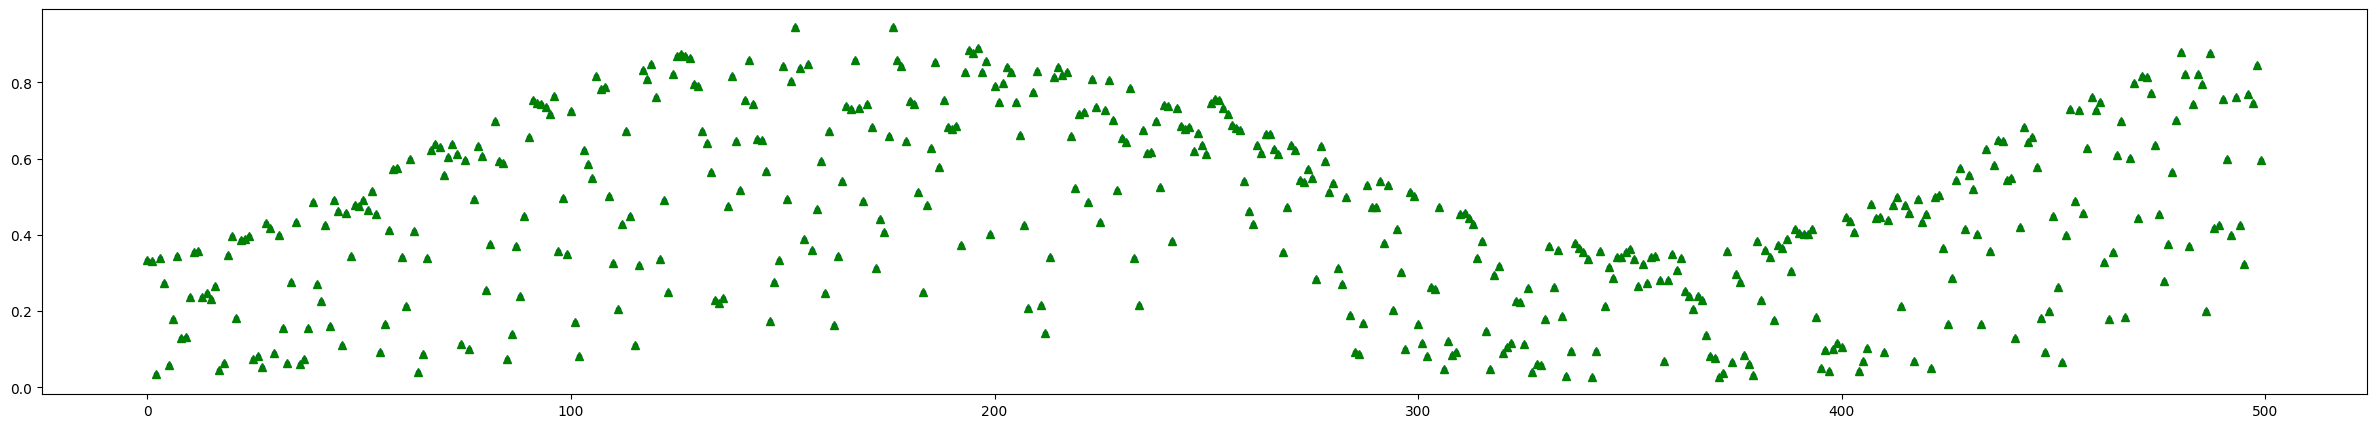

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
reg_lin = LinearRegression()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('REGL', reg_lin)])

np.random.seed(53)

start_time = time.time()
pipe_regr.fit(X_train, y_train)
end_time = time.time()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(pipe_regr,500)

# Ridge

Error cuadrático medio (MSE): 1893608268984736.0
Raíz cuadrada del error cuadrático medio (RMSE): 43515609.48653639
Mean Absolute Error (MAE): 37235406.03799489
Tiempo de entrenamiento: 0.2301347255706787
Mejor alpha encontrado: 20.490746898158502


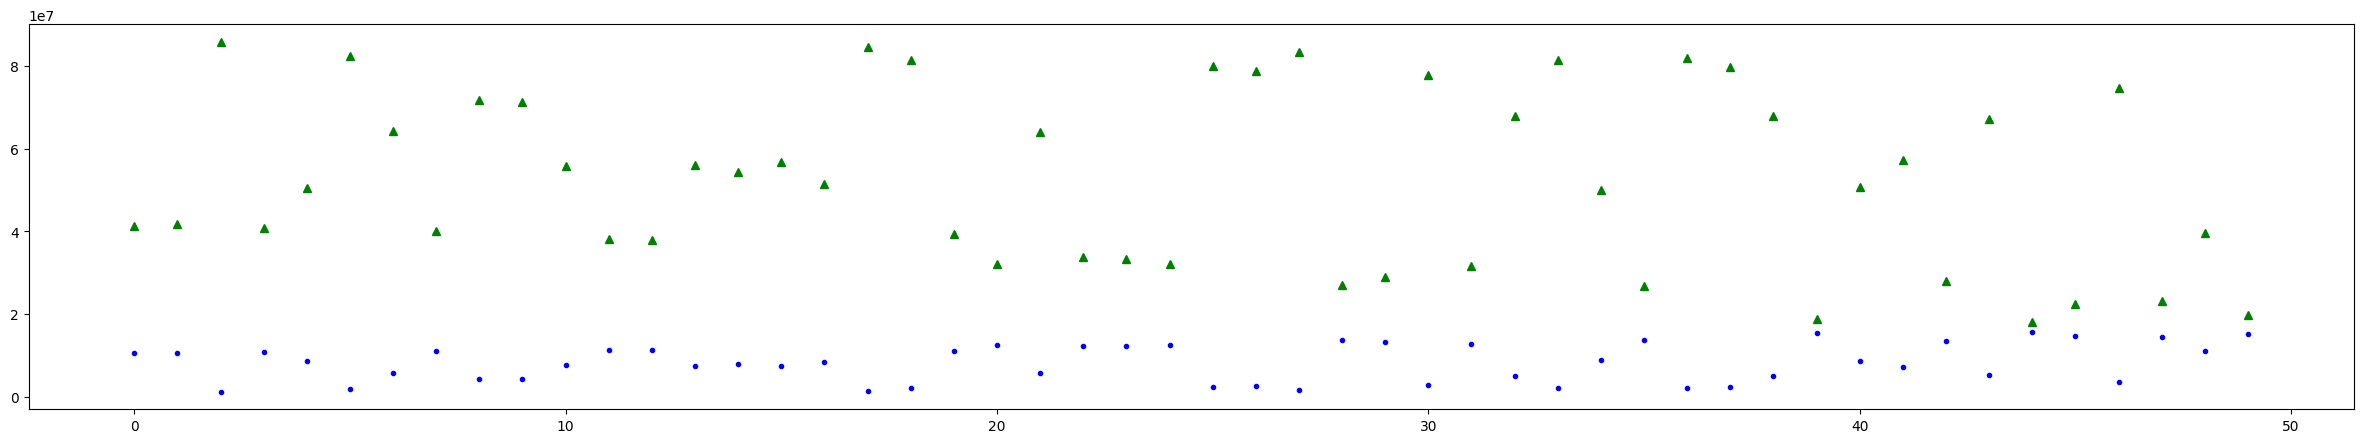

In [27]:
from sklearn.linear_model import RidgeCV

# Conjuntos de entrenamiento y prueba
X = disp_df.select_dtypes(include=np.number).columns.tolist()
y = ["salida"]
X_train, X_test = np.array_split(disp_df[X], [3650])
y_train, y_test = np.array_split(disp_df[y], [3650])

train_indices = np.full((2920,), -1, dtype=int)

val_indices = np.full((730,), 0, dtype=int)
test_fold = np.append(train_indices, val_indices)

regrRidge = RidgeCV(
            alphas          = np.logspace(-3, 8, 200),
            fit_intercept   = True,
            store_cv_values = True,
         )

start_time = time.time()
regrRidge.fit(X_train, y_train)
end_time = time.time()

y_pred = regrRidge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
best_alpha = regrRidge.alpha_

print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
print("Mejor alpha encontrado:", best_alpha)
pintaResultados(regrRidge,50)


# Lasso

c:\Users\joaqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Error cuadrático medio (MSE): 2652769.8816547804
Raíz cuadrada del error cuadrático medio (RMSE): 1628.7325998010785
Mean Absolute Error (MAE): 1233.4776164349341
Tiempo de entrenamiento: 0.2301347255706787
Mejor alpha encontrado: 0.004297004704320835


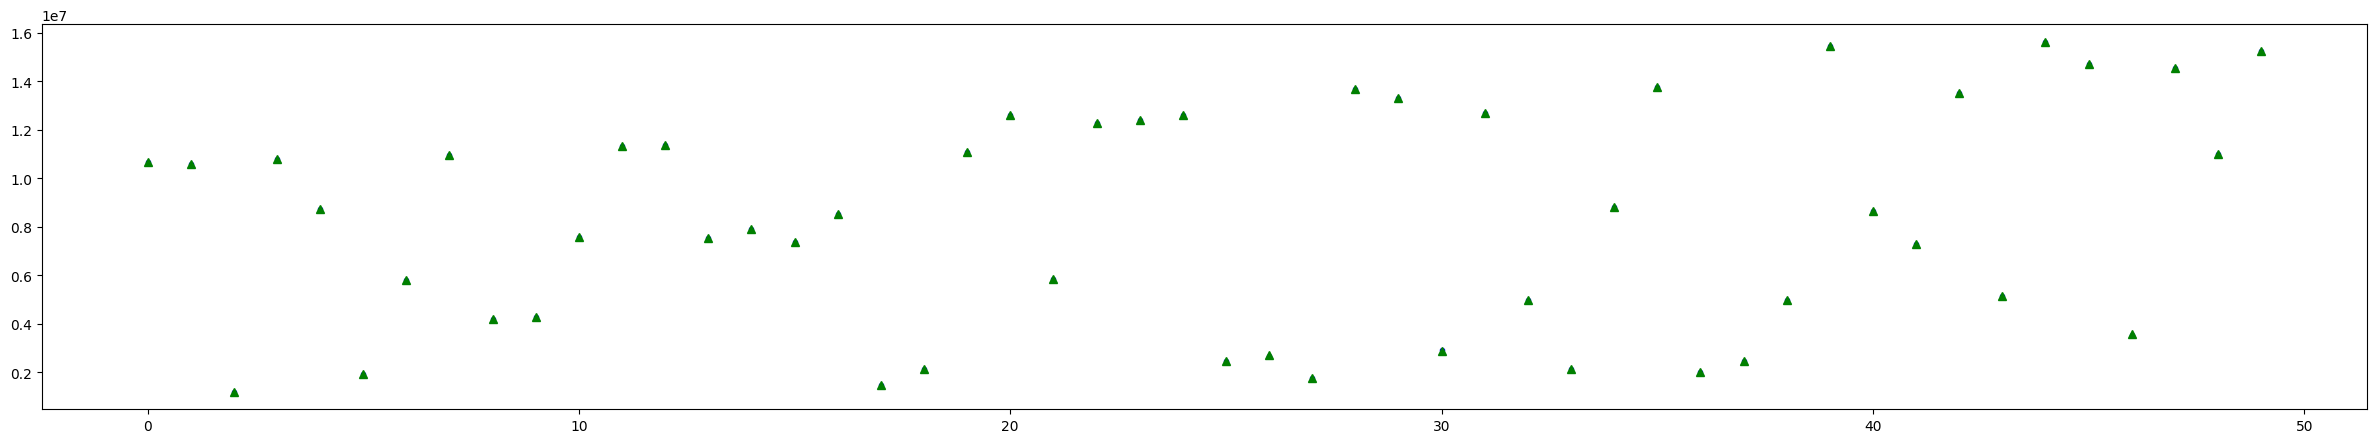

In [28]:
from sklearn.linear_model import LassoCV

# Conjuntos de entrenamiento y prueba
X = disp_df.select_dtypes(include=np.number).columns.tolist()
y = ["salida"]
X_train, X_test = np.array_split(disp_df[X], [3650])
y_train, y_test = np.array_split(disp_df[y], [3650])

train_indices = np.full((2920,), -1, dtype=int)

val_indices = np.full((730,), 0, dtype=int)
test_fold = np.append(train_indices, val_indices)

regrLasso = LassoCV(
            alphas          = np.logspace(-9, 3, 200),
            cv              = 10
         )

start_time = time.time()
regrLasso.fit(X_train, y_train)
end_time = time.time()

y_pred = regrLasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
best_alpha = regrLasso.alpha_

print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
print("Mejor alpha encontrado:", best_alpha)
pintaResultados(regrLasso,50)

# ElasticNet

c:\Users\joaqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\joaqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\joaqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\joaqu\AppData\Local\Progr

Error cuadrático medio (MSE): 2699157.6625409666
Raíz cuadrada del error cuadrático medio (RMSE): 1642.9113373949815
Mean Absolute Error (MAE): 1249.2108169085761
Tiempo de entrenamiento: 0.2301347255706787
Mejor alpha encontrado: 4.347013158125026e-06


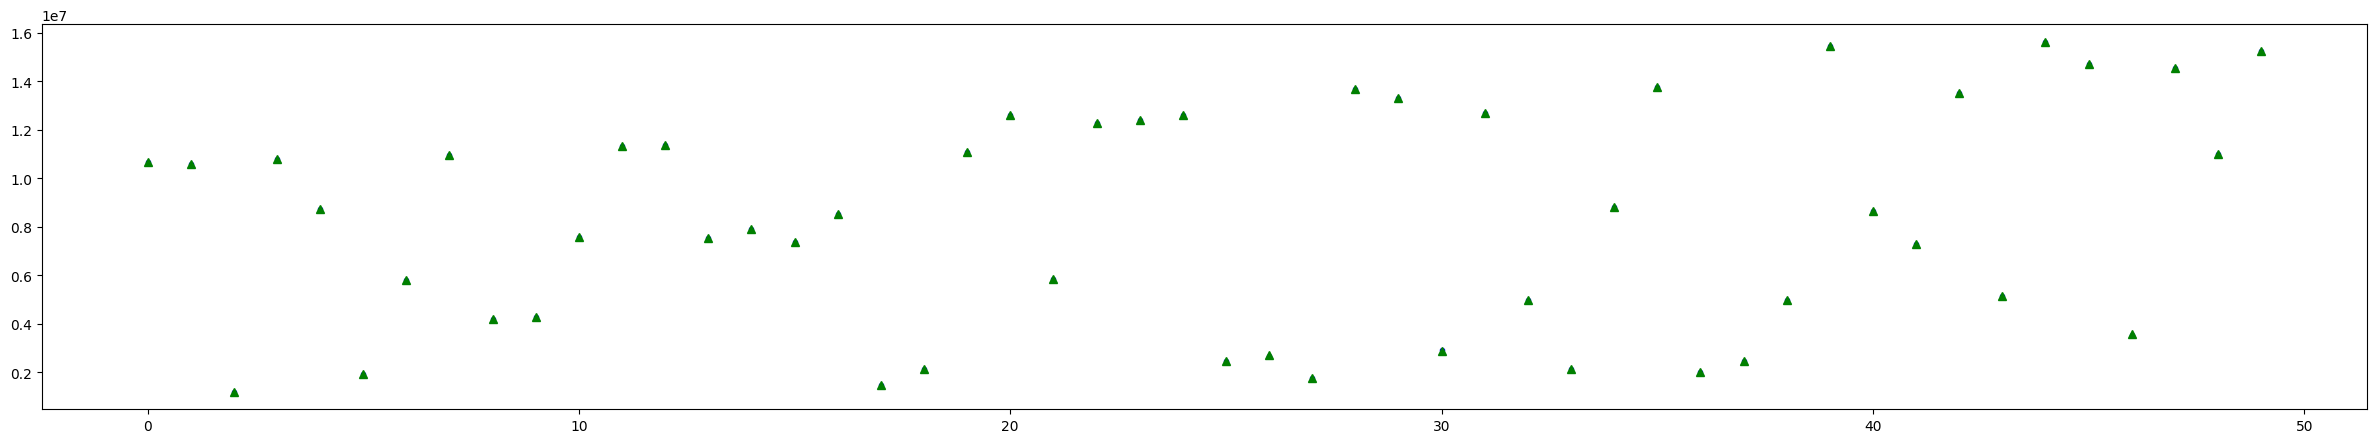

In [29]:
from sklearn.linear_model import ElasticNetCV

# Conjuntos de entrenamiento y prueba
X = disp_df.select_dtypes(include=np.number).columns.tolist()
y = ["salida"]
X_train, X_test = np.array_split(disp_df[X], [3650])
y_train, y_test = np.array_split(disp_df[y], [3650])

train_indices = np.full((2920,), -1, dtype=int)

val_indices = np.full((730,), 0, dtype=int)
test_fold = np.append(train_indices, val_indices)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

regrElastic = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )

start_time = time.time()
regrElastic.fit(X_train, y_train)
end_time = time.time()

y_pred = regrElastic.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
best_alpha = regrElastic.alpha_

print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
print("Mejor alpha encontrado:", best_alpha)
pintaResultados(regrLasso,50)

In [30]:
rmse_lineal = rmse(y_test, pipe_regr.predict(X=X_test))
rmse_ridge = rmse(y_test, regrRidge.predict(X=X_test))
rmse_lasso = rmse(y_test, regrLasso.predict(X=X_test))
rmse_elastic = rmse(y_test, regrElastic.predict(X=X_test))
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_lineal, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

TypeError: 'numpy.float64' object is not callable

# 5) Dimensionalidad del problema

# 6) Métodos avanzados

## SVM

In [ ]:
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.metrics import accuracy_score, r2_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
# Conjuntos de entrenamiento y prueba
X = disp_df.select_dtypes(include=np.number).columns.tolist()
y = ["salida"]
X_train, X_test = np.array_split(disp_df[X], [3650])
y_train, y_test = np.array_split(disp_df[y], [3650])

train_indices = np.full((2920,), -1, dtype=int)

val_indices = np.full((730,), 0, dtype=int)
test_fold = np.append(train_indices, val_indices)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Creamos el modelo SVM lineal y lo ajustamos a los datos de entrenamiento
svm = SVR(kernel = 'rbf')

start_time = time.time()
svm.fit(X_train, y_train)
end_time = time.time()

# Realizamos predicciones sobre los datos de prueba
y_pred = svm.predict(X_test)

# Calculamos la precisión del modelo
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Coeficiente de determinación del modelo: -0.001969887749284416
Tiempo de entrenamiento: 0.005017757415771484


## Random forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics

In [ ]:
# Conjuntos de entrenamiento y prueba
X = disp_df.select_dtypes(include=np.number).columns.tolist()
y = ["salida"]
X_train, X_test = np.array_split(disp_df[X], [3650])
y_train, y_test = np.array_split(disp_df[y], [3650])

train_indices = np.full((2920,), -1, dtype=int)

val_indices = np.full((730,), 0, dtype=int)
test_fold = np.append(train_indices, val_indices)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, 
                   param_grid,
                   scoring="r2",
                   cv=5,
                   n_jobs = 1,
                   verbose = 1)


start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)


# Realizamos predicciones sobre los datos de prueba
y_pred = rf.predict(X_test)

# Calculamos la precisión del modelo
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)



Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',